In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [7]:
tf.__version__

'2.13.0'

In [14]:
df = pd.read_csv('diabetes.csv')

In [32]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = df [feature_cols]
y = df['Outcome']

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 16)

In [83]:
logreg = LogisticRegression(max_iter=200)

In [84]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [85]:
y_pred = logreg.predict(X_test)

In [86]:
from sklearn import metrics

In [87]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)

In [88]:
cnf_matrix

array([[116,   9],
       [ 26,  41]])

In [90]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 427.9555555555555, 'Predicted Label')

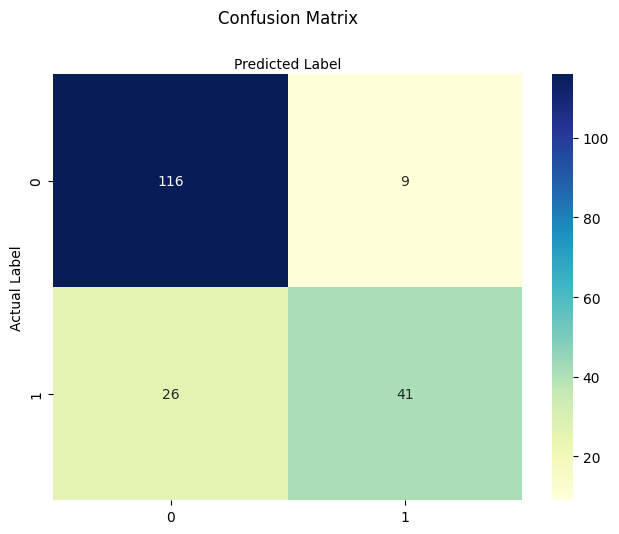

In [95]:
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap="YlGnBu", fmt = 'g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion Matrix', y = 1.1)
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


In [96]:
from sklearn.metrics import classification_report

In [97]:
target_names = ['with diabetes', 'without diabetes']

In [99]:
print(classification_report(y_test, y_pred, target_names = target_names))

                  precision    recall  f1-score   support

   with diabetes       0.82      0.93      0.87       125
without diabetes       0.82      0.61      0.70        67

        accuracy                           0.82       192
       macro avg       0.82      0.77      0.78       192
    weighted avg       0.82      0.82      0.81       192



In [100]:
y_pred_proba = logreg.predict_proba(X_test)[::,1] 

In [101]:
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)

In [102]:
auc = metrics.roc_auc_score(y_test, y_pred_proba)

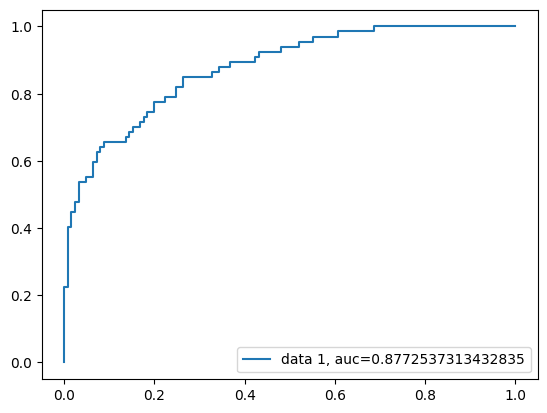

In [103]:
plt.plot(fpr, tpr, label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()